# Práctica 1 - Aprendizaje Automático Búsqueda Iterativa de Óptimos y Regresión Lineal

Límite de entrega: 3 de Abril de 2022 a las 23:59 (PRADO)\
Valoración máxima: 12 puntos (+2 puntos de Bonus)

Es obligatorio presentar un informe con las valoraciones y decisiones adoptadas en el desarrollo de cada uno de
los apartados. En dicho informe se incluirán los gráficos generados. También deberá incluirse una valoración sobre la
calidad de los resultados encontrados. Sin este informe se considera que el trabajo NO ha sido presentado. El informe debe estar integrado en este mismo cuaderno
(intercalando texto, código y resultados).

# 1. EJERCICIO SOBRE LA BÚSQUEDA ITERATIVA DE ÓPTIMOS (6.5 puntos)

Función aportada por el profesor para el dibujado del progreso por la función usando el descenso del gradiente

In [ ]:
'''
Esta función muestra una figura 3D con la función a optimizar junto con el 
óptimo encontrado y la ruta seguida durante la optimización. Esta función, al igual
que las otras incluidas en este documento, sirven solamente como referencia y
apoyo a los estudiantes. No es obligatorio emplearlas, y pueden ser modificadas
como se prefiera. 
    rng_val: rango de valores a muestrear en np.linspace()
    fun: función a optimizar y mostrar
    ws: conjunto de pesos (pares de valores [x,y] que va recorriendo el optimizador
                           en su búsqueda iterativa del óptimo)
    colormap: mapa de color empleado en la visualización
    title_fig: título superior de la figura
    
Ejemplo de uso: display_figure(2, E, ws, 'plasma','Ejercicio 1.2. Función sobre la que se calcula el descenso de gradiente')
'''
def display_figure(rng_val, fun, ws, colormap, title_fig):
    # https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
    from mpl_toolkits.mplot3d import Axes3D
    x = np.linspace(-rng_val, rng_val, 50)
    y = np.linspace(-rng_val, rng_val, 50)
    X, Y = np.meshgrid(x, y)
    Z = fun(X, Y) 
    fig = plt.figure(figsize= (12,9))
    ax = Axes3D(fig) # auto_add_to_figure=False)
    fig.add_axes(ax)
    ax.plot_surface(X, Y, Z, edgecolor='none', rstride=1,
                            cstride=1, cmap=colormap, alpha=.6)
    if len(ws)>0:
        ws = np.asarray(ws)
        min_point = np.array([ws[-1,0],ws[-1,1]])
        min_point_ = min_point[:, np.newaxis]
        ax.plot(ws[:-1,0], ws[:-1,1], fun(ws[:-1,0], ws[:-1,1]), 'r*', markersize=5)
        ax.plot(min_point_[0], min_point_[1], fun(min_point_[0], min_point_[1]), 'r*', markersize=10)
    if len(title_fig)>0:
        fig.suptitle(title_fig, fontsize=16)
    fig.show()

## EJERCICIO.1.1:  1 punto
**Implementar el algoritmo de gradiente descendente**

---



En este primer ejercicio implementaremos el algoritmo del gradiente descendente visto en teoría.\
Se trata de un algoritmo de minimización de funciones, posteriormente esta función a minimizar será la función de error en la muestra, aunque de momento, se trata simplemente de las funciones $E(u,v)$ y $f(x,y)$.\
La definición del gradiente descendente para una función $f(w)$ sería:\
$\large w_j:=w_j-η\frac{\partial f(w)}{\partial w_j}$\
donde:
* $f(w)$ es la función a minimizar (en nuestro caso $E(u,v)$)
* $\eta$ es el *learning rate* (en nuestro caso lr)
* $\large \frac{\partial f(w)}{\partial w_j}$ es el gradiente de la función $f$ (en nuestro caso grad_fun)
* $w$ es el vector de variables de la función (en nuestro caso $w=(u,v)$)

De esta forma, el gradiente descendente irá recorriendo el siguiente camino:

<img src="https://www.iartificial.net/wp-content/uploads/2019/03/gradiente-descendiente.jpg" width="400"/>

Sin embargo, hay que tener en cuenta que el valor de la constante $\eta$ será crucial para alcanzar este mínimo deseado, pues puede darse el caso de que:
* Si cogemos un $\eta$ demasiado grande, "saltaremos el mínimo por encima" y nos costará mucho llegar a él
* Si cogemos un $\eta$ muy pequeño, los pasos serán muy pequeñitos y necesitaremos muchas iteraciones para llegar al mínimo

<img src="https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png" width="500"/>

En nuestro caso, escogeremos el $\eta$ que  se nos propone en el template $\eta = 0,01$, aunque posteriormente, en el ejercicio 1.3, analizaremos el impacto de la modificación del learning rate, pero, como ya he comprobado que en este caso el learning rate propuesto es adecuado, me quedaré con este.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

np.random.seed(1)

# Se declara la variable ws que será un array de parejas (u, v) que serán utilizadas después para
# representar el "camino" que recorre el gradiente descendiente
ws = []

# w_ini: punto de inicio del gradiente (u0, v0)
# lr: eta= learning rate (que regula el "tamaño" del paso que da el gradiente en cada iteración)
# grad_fun: el gradiente de la función a minimizar
# fun: la función a minimizar
# epsilon: el valor de la función que se quiere alcanzar, cuando se alcance, se interrumpirá la función y se devolverá el w alcanzado
# max_iters: el valor máximo de iteraciones que se pueden dar, cuando se alcancen, se interrumpirá la funión y se devolverá el w alcanzado
def gradient_descent(w_ini, lr, grad_fun, fun, epsilon, max_iters):
    ws.clear()
    ws.append(w_ini)
    w = w_ini
    it=0
    # mientras no se llegue al máximo de iteraciones y no se alcance el valor mínimo deseado
    while it<max_iters and not (fun(w[0],w[1])<epsilon):
      # se añade el valor al array de puntos para el dibujo
      ws.append(w)
      # se aplica el descenso del gradiente
      w = w - lr*grad_fun(w[0],w[1])     
      it+=1

    ws.append(w)

    return w, it   

Cabe destacar que en la implementación, el gradiente se aplica a los dos valores de $w$ a la vez, mediante operaciones simples con vectores (producto de un escalar por un vector y resta de dos vectores)

## EJERCICIO.1.2: 2 puntos
**Considerar la función $E(u, v) = (uve^{(−u^2−v^2)})^2$. Usar gradiente descendente para
encontrar un mınimo de esta función, comenzando desde el punto $(u, v) = (0.5, -0.5)$ y usando
una tasa de aprendizaje $\lambda = 0.1$.\
a) Calcular analíticamente y mostrar la expresión del gradiente de la función $E(u, v)$**

---
\
Si $f:ℝ^n→ℝ$, el gradiente $∇f:ℝ→ℝ$, se define como el vector cuyas componentes son las derivadas parciales de la función.\
Esto es, si $r∈ℝ^n$, $r=(x_1,x_2,...,x_n)$:\
$∇f(r)=(\frac{∂f}{∂x_1},\frac{∂f}{∂x_2},..., \frac{∂f}{∂x_n})$\
\
En nuestro caso por tanto, el gradiente de la función $E(u,v)$, con $u,v∈ℝ$, se define como:\
$∇E(u,v)=(\frac{∂E}{∂u}, \frac{∂E}{∂v})$\
\
Por tanto, el primer paso para el cálculo del gradiente de nuestra función es calcular las derivadas parciales de la función con respecto a las dos variables:\
<br>

### Cálculo de $\frac{∂E}{∂u}$
Para el cálculo de la derivada parcial, tratamos la segunda variable $v$ como una constante\
$\large\frac{∂((vue^{-u^2-v^2})^2)}{∂u}=\frac{∂(v^2u^2e^{2(-u^2-v^2)})}{∂u}=v^2(\frac{∂(u^2)}{∂u}·e^{2(-u^2-v^2)}+u^2·\frac{∂(e^{2(-u^2-v^2)})}{∂u})=$\
\
$=v^2(2ue^{2(-u^2-v^2)}+2u^2e^{2(-u^2-v^2)}·(-2u))=$\
$=2v^2ue^{2(-u^2-v^2)}·(1-2u^2)$\
<br>
### Cálculo de $\frac{∂E}{∂v}$
Igualmente, tratamos $u$ como una constante\
$\large\frac{∂((vue^{-u^2-v^2})^2)}{∂v}=\frac{∂(v^2u^2e^{2(-u^2-v^2)})}{∂v}=u^2(\frac{∂(v^2)}{∂v}·e^{2(-u^2-v^2)}+v^2·\frac{∂(e^{2(-u^2-v^2)})}{∂v})=$\
$=u^2(2ve^{2(-u^2-v^2)}+2v^2e^{2(-u^2-v^2)}·(-2v))=$\
$=2u^2ve^{2(-u^2-v^2)}·(1-2v^2)$\
<br>
### Gradiente de $E$ ($∇E(u,v)$)
De esta forma, ya tenemos definido el gradiente de $E$:\
$∇E(u,v)=(2v^2ue^{2(-u^2-v^2)}·(1-2u^2),\ 2u^2ve^{2(-u^2-v^2)}·(1-2v^2))$

In [ ]:
# Definimos la función
def E(u,v):
    return (u*v*np.exp(-u**2-v**2))**2#función E

#Derivada parcial de E con respecto a u
def dEu(u,v):
    return 2*(v**2)*u*np.exp(2*(-u**2-v**2)) * (1-2*(u**2))#Derivada parcial de E con respecto a u
    
#Derivada parcial de E con respecto a v
def dEv(u,v):
    return 2*(u**2)*v*np.exp(2*(-u**2-v**2))*(1-2*(v**2))#Derivada parcial de E con respecto a v

#Gradiente de E
def gradE(u,v):
    return np.array([dEu(u,v), dEv(u,v)])


**b) ¿Cuántas iteraciones tarda el algoritmo en obtener por primera vez un valor de $E(u, v)$ inferior a $10^{−8}$.**


---



Este valor no es más que el valor $\texttt{it}$ que nos devuelve la función gradient_descent, el número de la iteración en la que el error es menor al solicitado (o el número máximo de iteraciones que se le permite hacer al algoritmo).\
<br>

**c) ¿En qué coordenadas $(u, v)$ se alcanzó por primera vez un valor igual o menor que $10^{-8}$ en el apartado anterior**


---


Este valor también es devuelto por la función gradient_descent y es el $\texttt{w}$, el primer punto en el que el valor de la función es menor que el umbral. Además, evaluando este punto con la función $E$ podemos ver la "altura" de este mínimo\
<br>
Para resolver tanto el apartado b) como el c), ejecutaremos la función gradient_descent con los datos aportados en la plantilla y mostraremos los resultados por pantalla:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Numero de iteraciones:  25117
Coordenadas obtenidas: ( 0.010000842574554563 ,  -0.010000842574554563 )
Valor obtenido:  9.99936950202903e-09




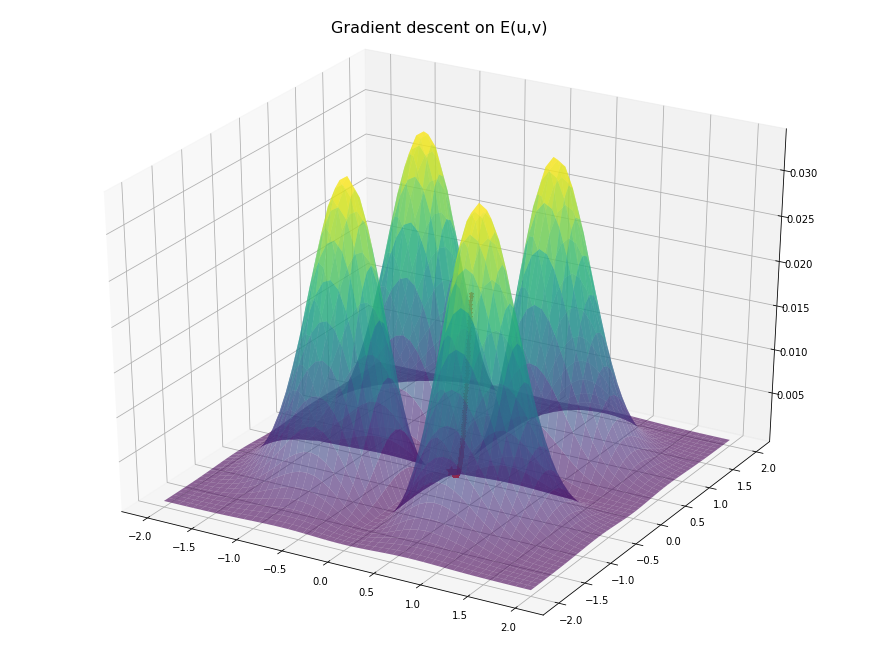

In [ ]:
eta = 0.1 
maxIter = 1e10
error2get = 1e-8
initial_point = np.array([0.5,-0.5])
w, it = gradient_descent(initial_point, eta, gradE, E, error2get, maxIter)

# Para mostrar el camino del gradiente
display_figure(2,E,ws,'viridis',"Gradient descent on E(u,v)")

print ('Numero de iteraciones: ', it)
print ('Coordenadas obtenidas: (', w[0], ', ', w[1],')')
print ('Valor obtenido: ', E(w[0],w[1]))
print ("\n")



Como vemos, para el punto inicial, el valor de learning_rate y de max_iters, la calidad del mínimo obtenido es muy buena ya que es un mínimo global en la función.

## EJERCICIO.1.3: 2 puntos

**Considerar ahora la función $f(x, y) = x^2 + 2y^2 + 2sin(2\pi x)sin(\pi y)$** \

**a) Usar gradiente descendente para minimizar esta función. Usar como punto inicial $(x_0 = -1, y_0 = 1)$, (tasa de aprendizaje $\eta$ = 0,01 y un máximo de 50 iteraciones. Generar un gráfico de cómo desciende el valor de la función con las iteraciones. Repetir el experimento pero usando $\eta$ = 0,1, comentar las diferencias y su dependencia de $\eta$.**


---


Del mismo modo que antes, calculamos el gradiente $∇f(x,y)=(\frac{∂f}{∂x},\frac{∂f}{∂y})$, por medio del cálculo de las derivadas parciales.\
<br>
### Cálculo de $\frac{∂f}{∂x}$
$\large\frac{∂f}{∂x}=\frac{∂(x^2)}{∂x}+2y^2+2\sin(πy)·\frac{∂(sin(2\pi x))}{∂x}=2x+2y^2+4π\sin(\pi y)\cos(2\pi x)$\
<br>
### Cálculo de $\frac{∂f}{∂y}$
$\large\frac{∂f}{∂y}=x^2+\frac{∂(2y^2)}{∂y}+2\sin(2πx)·\frac{∂(sin(πy))}{∂y}=x^2+4y+2π\sin(2πx)\cos(πy)$\
\
Una vez calculadas las podemos definir en python y utilizar la función gradient_descent con los datos indicados en este apartado


In [ ]:
def f(x,y):
  return x**2+2*y**2+2*np.sin(2*np.pi*x)*np.sin(np.pi*y)

def dfx(x,y):
  return 2*x+2*y**2+4*np.pi*np.sin(np.pi*y)*np.cos(2*np.pi*x)

def dfy(x,y):
  return x**2+4*y+2*np.pi*np.sin(2*np.pi*x)*np.cos(np.pi*y)

def gradf(x,y):
  return np.array([dfx(x,y),dfy(x,y)])

eta = 0.01
Numero de iteraciones:  50
Coordenadas obtenidas: ( -1.2183445873531777 ,  0.3458490061598802 )
Valor obtenido:  -0.011538817444263882




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


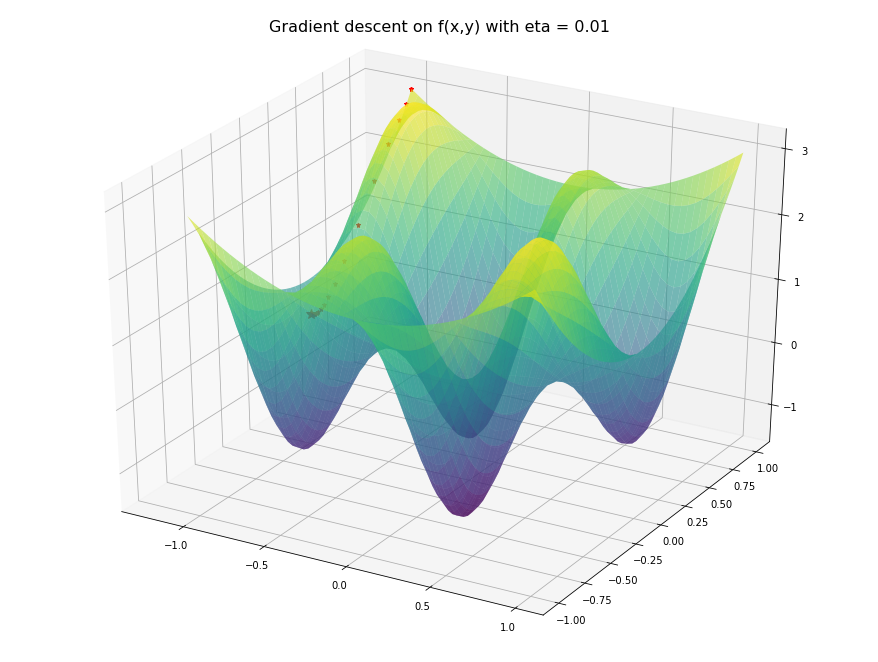

In [ ]:
ws=[]
p0 = np.array([-1.0,1.0])
lr = 0.01
max_iter = 50
w, it = gradient_descent(p0, lr, gradf, f, -999999999999, max_iter)

# Añado evolución del valor de la función para la comparación con diferentes lr
evolucion0 = np.zeros(len(ws))
for i in range(len(ws)):
  evolucion0[i] = f(ws[i][0], ws[i][1])

print("eta = 0.01")
print ('Numero de iteraciones: ', it)
print ('Coordenadas obtenidas: (', w[0], ', ', w[1],')')
print ('Valor obtenido: ', f(w[0],w[1]))
print("\n")
display_figure(1,f,ws,'viridis',"Gradient descent on f(x,y) with eta = 0.01")

Como vemos, este algoritmo con esta función no consigue alcanzar un mínimo global sino que se queda estancado en un mínimo local. Esto ocurre porque el algoritmo alcanza un punto en el cual el gradiente es 0. Esto se puede ver de forma sencilla ya que, aumentando el número máximo de iteraciones, el algoritmo no consigue llegar a un mínimo global tampoco y es, como digo, porque se queda estancado en un mínimo local en el cual el gradiente es 0. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


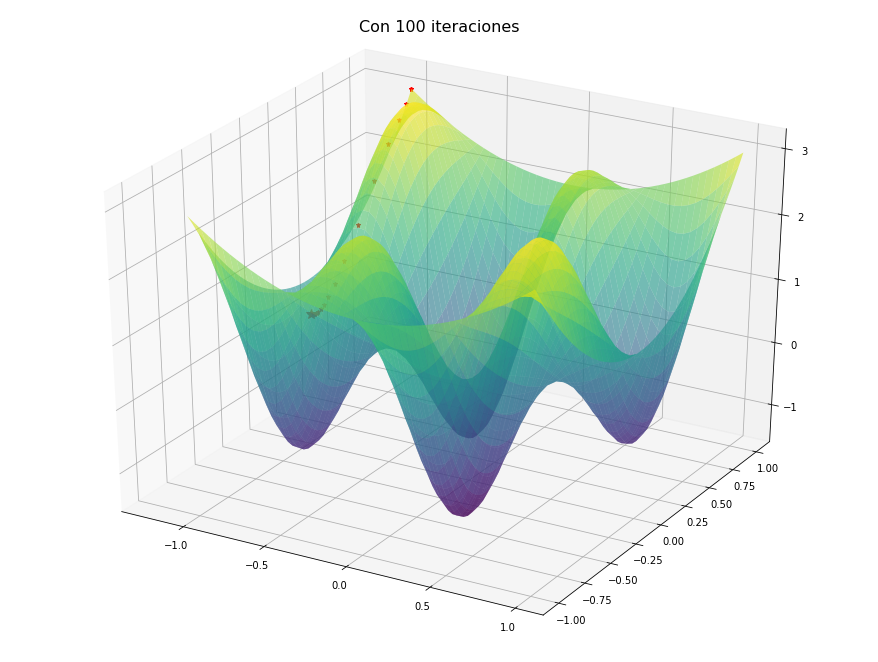

In [ ]:
w_prueba, it_prueba = gradient_descent(p0, lr, gradf, f, -999999999999, 200)
display_figure(1, f, ws, 'viridis', "Con 100 iteraciones")

Procedemos ahora a cambiar el learning rate por 0.1 como nos indica el enunciado y posteriormente comentaremos los resultados

eta = 0.1
Numero de iteraciones:  50
Coordenadas obtenidas: ( 1.299386249959895 ,  -0.5290187018609628 )
Valor obtenido:  0.35155262956720534




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


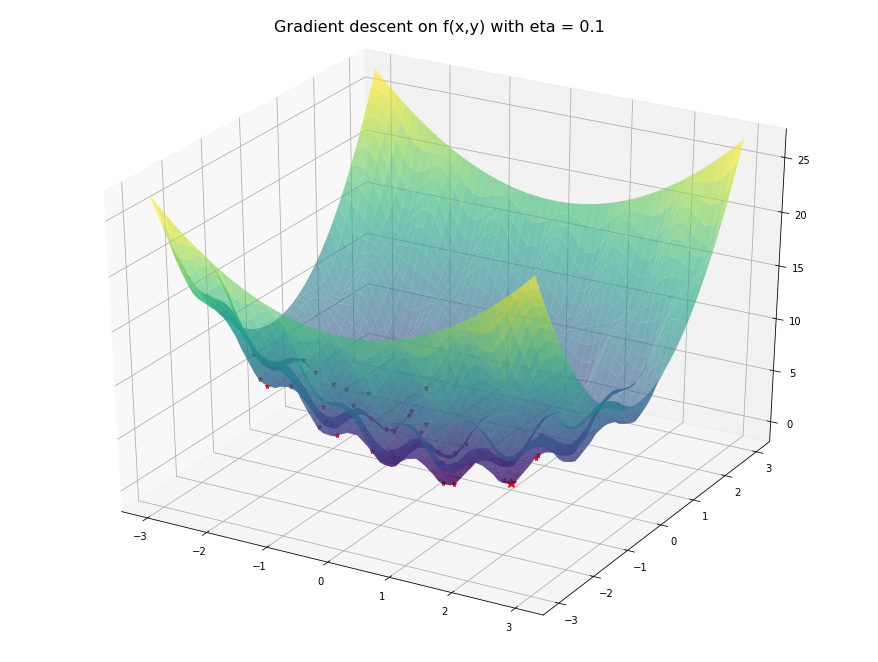

In [ ]:
ws=[]
p0 = np.array([-1.0,1.0])
lr = 0.1
max_iter = 50
w, it = gradient_descent(p0, lr, gradf, f, -999999999999, max_iter)

# Añado evolución del valor de la función para la comparación con diferentes lr
evolucion1 = np.zeros(len(ws))
for i in range(len(ws)):
  evolucion1[i] = f(ws[i][0], ws[i][1])

print("eta = 0.1")
print ('Numero de iteraciones: ', it)
print ('Coordenadas obtenidas: (', w[0], ', ', w[1],')')
print ('Valor obtenido: ', f(w[0],w[1]))
print("\n")
display_figure(3,f,ws,'viridis',"Gradient descent on f(x,y) with eta = 0.1")

Con el objetivo de comparar los resultados más claramente, representaremos en dos gráficas el valor de la función alcanzado con respecto al número de iteraciones para los dos distintos valores de learning rate. Para ello, podemos utilizar el valor de la función en los puntos de ws, que hemos usado antes para representar el camino. Lo añado a los bloques de antes para no repetir código:

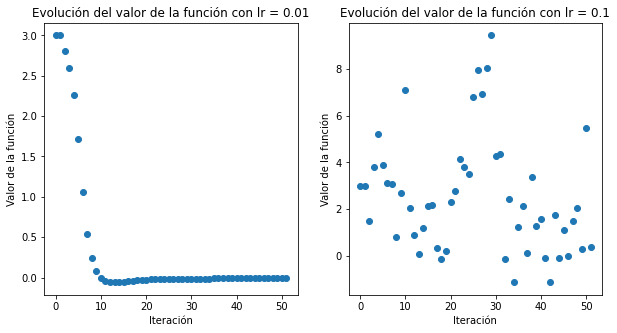

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.set_title("Evolución del valor de la función con lr = 0.01")
ax.set_xlabel("Iteración")
ax.set_ylabel("Valor de la función")
ax.scatter(range(evolucion0.size), evolucion0)

ax = fig.add_subplot(1,2,2)
ax.set_title("Evolución del valor de la función con lr = 0.1")
ax.set_xlabel("Iteración")
ax.set_ylabel("Valor de la función")
ax.scatter(range(evolucion1.size), evolucion1)

plt.show()


Como podemos observar, escogiendo un valor de learning rate inadecuado (en este caso 0.1), el gradiente descendente no llegará a un mínimo en la función, ya que va dando saltos, sí en la dirección que le indica el gradiente, pero son tan grandes, que se vuelve inútil saltar hacia ahí.\
Un símil sería como si estuviéramos jugando al golf y, estando a 5 metros del hoyo, golpeáramos la bola en dirección al hoyo pero con la fuerza del primer golpe, en el que estamos muy lejos del hoyo.\
Cabe destacar también que un mecanismo de "regulación" de esta velocidad con la que se dan los saltos es el no normalizar el vector del gradiente. El vector gradiente nos dice no sólo hacia dónde crece la función (en negativo hacia dónde decrece), sino también cuánto está creciendo la función en ese punto (decreciendo si negativo).

**b) Obtener el valor mínimo y los valores de las variables $(x, y)$ en donde se alcanzan cuando
el punto de inicio se fija en: (-0.5, -0.5), (1, 1), (2.1,-2.1), (-3, 3), (-2, 2). Generar una
tabla con los valores obtenidos. Comentar la dependencia del punto inicial.**


---


Procedo a ejecutar el algoritmo con los distintos valores de p0 que nos piden y posteriormente comentaré los resultados


p0= ( -0.5 ,  -0.5 )
Numero de iteraciones:  50
Coordenadas obtenidas: ( -0.735935370982717 ,  -0.4380414240822073 )
Valor obtenido:  -1.0292130298548265
p0= ( 1.0 ,  1.0 )
Numero de iteraciones:  50
Coordenadas obtenidas: ( 0.7262691684678586 ,  0.390774586147818 )
Valor obtenido:  -1.0296305899364997
p0= ( 2.1 ,  -2.1 )
Numero de iteraciones:  50
Coordenadas obtenidas: ( 1.640070652459635 ,  -1.32055182782272 )
Valor obtenido:  4.874506546059479
p0= ( -3 ,  3 )
Numero de iteraciones:  50
Coordenadas obtenidas: ( -2.6696468056677825 ,  -0.7599954680408545 )
Valor obtenido:  7.083902371550948
p0= ( -2 ,  2 )
Numero de iteraciones:  50
Coordenadas obtenidas: ( -1.218670957431083 ,  0.34913016799097296 )
Valor obtenido:  -0.016216835475380442


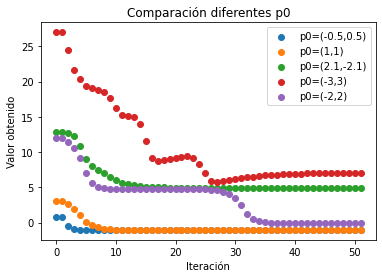

In [ ]:
ws=[]
p0 = np.array([-0.5,-0.5])
lr = 0.01
max_iter = 50
w, it = gradient_descent(p0, lr, gradf, f, -999999999999, max_iter)

sep="================================="
print ("p0= (", p0[0], ", ", p0[1], ")")
print ('Numero de iteraciones: ', it)
print ('Coordenadas obtenidas: (', w[0], ', ', w[1],')')
print ('Valor obtenido: ', f(w[0],w[1]))

valores0 = np.zeros(len(ws))
for i in range(len(ws)):
  valores0[i] = f(ws[i][0], ws[i][1])

print (sep)

p0 = np.array([1.0,1.0])
w, it = gradient_descent(p0, lr, gradf, f, -999999999999, max_iter)
print ("p0= (", p0[0], ", ", p0[1], ")")
print ('Numero de iteraciones: ', it)
print ('Coordenadas obtenidas: (', w[0], ', ', w[1],')')
print ('Valor obtenido: ', f(w[0],w[1]))
valores1 = np.zeros(len(ws))
for i in range(len(ws)):
  valores1[i] = f(ws[i][0], ws[i][1])
print (sep)

p0 = np.array([2.1,-2.1])
w, it = gradient_descent(p0, lr, gradf, f, -999999999999, max_iter)

print ("p0= (", p0[0], ", ", p0[1], ")")
print ('Numero de iteraciones: ', it)
print ('Coordenadas obtenidas: (', w[0], ', ', w[1],')')
print ('Valor obtenido: ', f(w[0],w[1]))
valores2 = np.zeros(len(ws))
for i in range(len(ws)):
  valores2[i] = f(ws[i][0], ws[i][1])
print (sep)

p0 = np.array([-3,3])
w, it = gradient_descent(p0, lr, gradf, f, -999999999999, max_iter)

print ("p0= (", p0[0], ", ", p0[1], ")")
print ('Numero de iteraciones: ', it)
print ('Coordenadas obtenidas: (', w[0], ', ', w[1],')')
print ('Valor obtenido: ', f(w[0],w[1]))
valores3 = np.zeros(len(ws))
for i in range(len(ws)):
  valores3[i] = f(ws[i][0], ws[i][1])
print (sep)

p0 = np.array([-2,2])
w, it = gradient_descent(p0, lr, gradf, f, -999999999999, max_iter)

print ("p0= (", p0[0], ", ", p0[1], ")")
print ('Numero de iteraciones: ', it)
print ('Coordenadas obtenidas: (', w[0], ', ', w[1],')')
print ('Valor obtenido: ', f(w[0],w[1]))
valores4 = np.zeros(len(ws))
for i in range(len(ws)):
  valores4[i] = f(ws[i][0], ws[i][1])
print (sep)

import matplotlib.pyplot as plt
plt.title("Comparación diferentes p0")
plt.xlabel("Iteración")
plt.ylabel("Valor obtenido")
plt.scatter(range(len(ws)),valores0, label="p0=(-0.5,0.5)")
plt.scatter(range(len(ws)),valores1, label="p0=(1,1)")
plt.scatter(range(len(ws)),valores2, label="p0=(2.1,-2.1)")
plt.scatter(range(len(ws)),valores3, label="p0=(-3,3)")
plt.scatter(range(len(ws)),valores4, label="p0=(-2,2)")
plt.legend()
plt.show()

La tabla sería la siguiente:

| Punto inicial | w alcanzado          | Valor alcanzado |
| ------------- | -------------------- | --------------- |
| (-0.5, 0.5) | (-0.7359,-0.438)   | -1.029213     |
| (1,1)       | ( 0.7263,  0.3908) | -1.02963      |
| (2.1,-2.1)  | (1.6401,-1.3206)   | 4.8745        |
| (-3,3)      | (-2.6696,-0.76)    | 7.0839        |
| (-2,2)      | (-1.2187,0.3491)   | -0.0162       |

  Como podemos ver, la calidad del mínimo alcanzado depende mucho del punto de inicio.\
  Esta función tiene muchos mínimos locales que pueden confundir al algoritmo del gradiente descendente, ya que si colocamos el punto de inicio cerca de uno de estos mínimos locales, el gradiente lo dirigirá hacia este mínimo local haciendo que cuando lo alcance se quede ahí y no siga avanzando, ya que el gradiente es 0 en los mínimos.\
  Es esto lo que pasa para los puntos de inicio $(-3,3)$ y $(-2.1,2.1)$, que al situarse en un inicio cerca de un mínimo local, el gradiente descendente los dirige hacia ahí y se quedan estancados.
  


## EJERCICIO.1.4: 1.5 punto
**¿Cuál sería su conclusión sobre la verdadera dificultad de encontrar el mínimo
global de una función arbitraria?**

---


Pues son dos las decisiones a tomar en la búsqueda de este mínimo:\
Por un lado, tenemos la decisión de elegir el learning rate adecuado. A pesar de que nosotros estemos usando el valor del gradiente (que nos dice con qué velocidad crece la función, decrece en el caso negativo), y no únicamente su dirección y sentido, de igual manera, debemos elegir un learning rate que se adecúe a la velocidad de decrecimiento de la función.\
Para ello, es una buena posibilidad hacer un estudio con diferentes valores de este learning rate y estudiar el error obtenido para dicho valor de learning rate. Algo así:\
<img src="https://miro.medium.com/max/778/1*HVj_4LWemjvOWv-cQO9y9g.png"> </img>\
Que nos permite ver qué valores de learning rate son mejores.\
<br>
La otra decisión a tomar sería la elección del punto de inicio. En general, para estos problemas pequeños de regresión, la mejor opción es la misma que para el learning rate, escoger un conjunto de puntos iniciales y comparar los resultados tal y como hemos hecho en el ejercicio anterior.

# 2 EJERCICIO SOBRE REGRESIÓN LINEAL (5.5 puntos)

---


Este ejercicio ajusta modelos de regresión a vectores de características extraídos a partir de
imágenes de dígitos manuscritos. En particular, se extraen dos características concretas que miden el valor medio del nivel de gris y la simetría del dígito respecto de su eje vertical. Solo se seleccionarán
para este ejercicio las imágenes de los números 1 y 5.

## EJERCICIO.2.1:  2.5 puntos
**Estimar un modelo de regresión lineal, a partir de los datos proporcionados por
los vectores de características dados, usando tanto el algoritmo de la pseudo-inversa como el
gradiente descendente estocástico (SGD). Las etiquetas serán $\{-1,1\}$, una por cada vector de
cada uno de los números. Pintar las soluciones obtenidas junto con los datos usados en el
ajuste. Valorar la bondad del resultado usando $E_{in}$ y $E_{out}$ (para $E_{out}$ calcular las predicciones
usando los datos del fichero de test).**

In [ ]:
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

label5=1
label1=-1

def readData(file_x, file_y):
	# Leemos los ficheros	
	datax = np.load(file_x)
	datay = np.load(file_y)
	y = []
	x = []	
	# Solo guardamos los datos cuya clase sea la 1 o la 5
	for i in range(0,datay.size):
		if datay[i] == 5 or datay[i] == 1:
			if datay[i] == 5:
				y.append(label5)
			else:
				y.append(label1)
			x.append(np.array([1, datax[i][0], datax[i][1]]))
			
	x = np.array(x, np.float64)
	y = np.array(y, np.float64)
	
	return x, y

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def draw_classification(X,y,w,range=[], title="",xl="",yl=""):
  plt.title(title)
  plt.xlabel(xl)
  plt.ylabel(yl)
  plt.scatter(X[:,1],X[:,2],c=y)
  plt.plot([0,1],[-w[0]/w[2], -w[0]/w[2]-w[1]/w[2]])
  if len(range)>0:
    plt.ylim(range)
  plt.show()

In [ ]:
X, y = readData('/content/drive/MyDrive/datos/X_train.npy','/content/drive/MyDrive/datos/y_train.npy')
X_test, y_test = readData('/content/drive/MyDrive/datos/X_test.npy','/content/drive/MyDrive/datos/y_test.npy')

### Cálculo del error
Previo a la implementación del método de la pseudo-inversa y del SGD, definiremos la función de error que nos dirá cómo de bien divide nuestro hiperplano el conjunto de valores.\
Tal y como hemos visto en teoría, la regresión utiliza la medida de error de la media de los cuadrados de las distancias de las estimaciones ($w^Tx_n$) al valor real ($y_n$). Esto se define así:\
$\large E(w)=\frac1N∑_{n=1}^N(h(x_n)-y_n)^2=\frac1N∑_{n=1}^N(w^Tx-y_n)^2$\
<br>
Adicionalmente, hemos implementado otra medida de error basada en el porcentaje de aciertos en las predicciones, ya que esta medida del error cuadrático no es demasiado explicativa en este problema de regresión.

In [ ]:
# X matrix Nx3
# y vector 1d N
# w vector 1d 3
def Err(X,y,w):
  error = 0.0
  # Para cada x_n e y_n
  for i in range(y.size):
    # Convertimos xn en una matriz columna de 3 filas para hacer el producto con w^T que es un vector 1d de tamaño 3
    xn=np.transpose(np.array([X[i]]))
    yn=y[i]
    error += (yn-np.dot(w,  xn))**2

  return error[0]/y.size

def cuenta_aciertos(X,y,w):
  aciertos = 0
  for n in range(y.size):
    if np.sign(np.dot(w,X[n]))==np.sign(y[n]):
      aciertos+=1

  return aciertos/y.size*100

### Pseudo-inversa
Una vez definida la función de error, podemos proceder al cálculo de la pseudo-inversa.\
Para el cálculo de esta pseudo-inversa utilizaremos el *Singular Value Decomposition* de la matriz $X$ de muestras.\
Esto nos permitirá descomponer $X$ en $X=UDV^T$ y asegurarnos el poder invertir el producto $X^TX=VDDV^T$\
Para llevarlo a cabo, utilizaremos la función svd del paquete numpy.linalg.svd

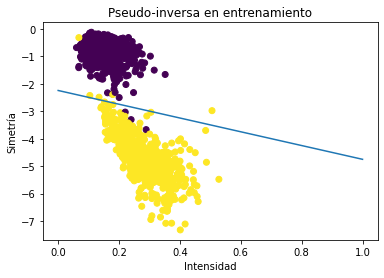

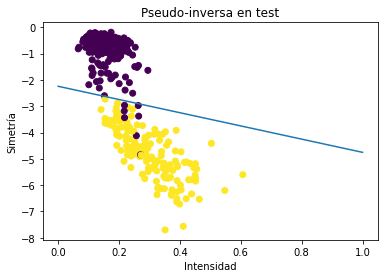

In [ ]:
# X es una matriz de N filas y 3 columnas
# y es un vector 1d de tamaño N
def pseudoInverse(X,y):
  u, s, vt = np.linalg.svd(X)

  d = np.diag(s)  
  vd = np.dot(vt.T, d)
  vdd = np.dot(vd,d)
  xtx = np.dot(vdd,vt)
  xtxinv = np.linalg.inv(xtx)

  pseudoinverse = np.dot(xtxinv, X.T)

  return np.dot(pseudoinverse, y)

# w pseudoInverse devuelve una matriz columna, la trasponemos para que sea un vector 1d, que se correspondería
# con w^T, pero como usamos w^T en la mayoría de cálculos, nos ahorramos estar constantemente trasponiéndola
w = np.transpose(pseudoInverse(X,y))

draw_classification(X,y,w, title="Pseudo-inversa en entrenamiento", xl="Intensidad", yl="Simetría")
draw_classification(X_test, y_test, w, title="Pseudo-inversa en test", xl="Intensidad", yl="Simetría")

Una vez calculada la pseudo-inversa, la utilizamos para obtener el ajuste y medimos su bondad para el conjunto de entrenamiento (error dentro de la muestra) y de test (error fuera de la muestra).\
Igualmente como no es común usar el modelo de regresión para problemas de clasificación, esta medida del error de los cuadrados de las distancias, no nos indica mucho con respecto a la bondad de nuestras estimaciones, por tanto, vamos a calcular también el porcentaje de aciertos que hemos tenido tanto dentro como fuera de la muestra

In [ ]:
print("Bondad del resultado para la pseudo-inversa:")
print("Ein: ", Err(X,y,w))
print("Porcentaje de aciertos en la muestra: ", cuenta_aciertos(X,y,w), "%")
print("Eout: ", Err(X_test, y_test, w))
print("Porcentaje de aciertos fuera de la muestra: ", cuenta_aciertos(X_test, y_test, w), "%")

Bondad del resultado para la pseudo-inversa:
Ein:  0.07918658628900382
Porcentaje de aciertos en la muestra:  99.48750800768738 %
Eout:  0.1309538372005259
Porcentaje de aciertos fuera de la muestra:  98.34905660377359 %


Como podemos observar, la pseudo-inversa es un método que nos da un ajuste verdaderamente bueno, pero sin embargo, tiene algunos contras:
* El cálculo de $(X^TX)^{-1}$ puede ser muy costoso si la dimensionalidad de $X^TX$ es muy alta, es decir, si tenemos muchas características
* Es sólo aplicable a regresión lineal y no es extrapolable a otros modelos

### SGD
El *Stochastic Gradient Descent* es una variante que divide el conjunto de las muestras en minibatches.\
De esta forma, al utilizar solo una parte de la muestra para el cálculo del gradiente, conseguimos:
* Una mayor variabilidad de los datos en la estimación del gradiente
* Un procesamiento más rápido
* Aunque no hay demostración teórica, sí  que hay pruebas empíricas de que se obtiene un mínimo local mejor para funciones no convexas

Aunque se puede usar solo un item en cada iteración, está aceptado normalmente un tamaño de minibatch de entre 32 hasta 128.\
En todo lo que sigue, hablo indistintamente de número de épocas y de iteraciones, sin embargo, siempre estoy haciendo referencia al número de épocas, es decir, al número de recorridos completos a la muestra, ya que el número de iteraciones (número de batches recorridos) nunca es para mí un criterio de parada.

In [ ]:
# xn será un vector 1d
# yn será un valor
# devuelve un vector 1d de tamaño 3 (gradiente)
def gradErr(xn,yn,w):
  hx = np.dot(w, xn)
  return np.dot(xn, hx-yn)

# X matriz de N filas y 3 columnas
# y vector 1d de tamaño N
# w vector 1d de tamaño 3
def sgd(X, y, w_0, lr, max_iter, batch_size):
  # Creamos un vector de índices
  indices = np.arange(0,y.size, 1)
  num_batches = y.size//batch_size+1
  it = 0
  w = w_0

  while it < max_iter: 
    # En cada iteración, barajamos los índices (la muestra)
    np.random.shuffle(indices)
    # Para cada grupo de índices de tamaño M
    for i in range(num_batches):
      # Nos quedamos con el minibatch que corresponde
      minibatch=indices[i*batch_size:(i+1)*batch_size]
      # Iteramos dentro del minibatch
      suma = np.zeros(w.size)
      for n in minibatch:
        # Aplicando el gradiente dentro del minibatch
        suma += gradErr(X[n],y[n],w)
      suma = 2*suma/batch_size
      w = w - lr*suma
    it +=1
  return w, it


Número de épocas:  200
Bondad del resultado para el sgd:
Ein:  0.08037168628018801
Porcentaje de aciertos en la muestra:  99.35938500960923 %
Eout:  0.13282512620195738
Porcentaje de aciertos fuera de la muestra:  98.11320754716981 %


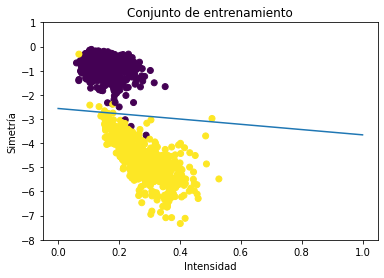

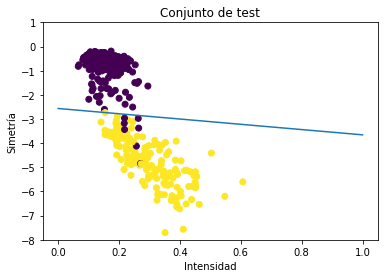

In [ ]:
w, it = sgd(X, y, np.zeros(len(X[0])), 0.01, 200, 32)
print("Número de épocas: ", it)
print("Bondad del resultado para el sgd:")
print("Ein: ", Err(X,y,w))
print("Porcentaje de aciertos en la muestra: ", cuenta_aciertos(X,y,w), "%")
print("Eout: ", Err(X_test, y_test, w))
print("Porcentaje de aciertos fuera de la muestra: ", cuenta_aciertos(X_test, y_test, w), "%")
draw_classification(X,y, w, title="Conjunto de entrenamiento", range=[-8,1], xl="Intensidad", yl="Simetría")
draw_classification(X_test, y_test, w, title="Conjunto de test", range=[-8,1], xl="Intensidad", yl="Simetría")

#### Elección del learning rate
Hasta este punto, el learning rate usado para la función sgd ha sido completamente arbitrario.\
Sin embargo ahora, voy a llevar a cabo un pequeño estudio para ver la influencia de diferentes valores de learning rate usando para la comparación el valor del porcentaje de aciertos en función del valor del learning rate.\
Para ello, estableceré un rango de valores para lr que irá desde $0.1$, dividiendo en cada paso el lr entre 10:

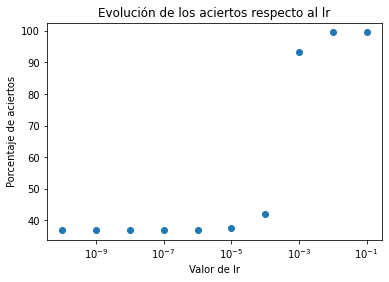

In [ ]:
# Estudio del error respecto a lr
rango = range(10)
xs = np.zeros(len(rango))
aciertos = np.zeros(len(rango))

lr = 0.1
for i in rango:
  w, it = sgd(X,y,np.array([0,0,0]),lr, 5, 32)
  aciertos[i] = cuenta_aciertos(X,y,w)
  xs[i]=lr
  lr = lr/10

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(xs, aciertos)
ax.set_title("Evolución de los aciertos respecto al lr")
ax.set_xlabel("Valor de lr")
ax.set_ylabel("Porcentaje de aciertos")
ax.set_xscale("log")


Como podemos ver, a partir de un valor inferior a $10^{-3}$ el número de aciertos decrementa.\
Con esto podemos concluir que, un valor de learning rate cercano a 0.01, el error obtenido es el mejor posible.

#### Análisis de la cantidad de épocas
Del mismo modo que hemos realizado un pequeño estudio experimental para la estimación del learning rate adecuado, realizaremos otro estudio para el número máximo de épocas que utiliza el sgd.\
Del mismo modo, ejecutaremos el sgd para diferentes valores del parámetro max_iters, analizando el valor de error obtenido para cada uno.\
En mi caso, escojo el rango $\{1,2,...,14\}$ de valores para max_iters (por max_iters me refiero al número de épocas), obteniendo los siguientes resultados.

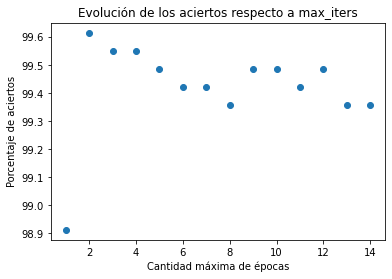

In [ ]:
xs = range(1,15,1)
aciertos = np.zeros(len(xs))

pos = 0
for max_iters in xs:
  w, it = sgd(X, y, np.zeros(3),0.01, max_iters, 32)
  aciertos[pos] = cuenta_aciertos(X,y,w)
  pos += 1

plt.scatter(xs, aciertos)
plt.title("Evolución de los aciertos respecto a max_iters")
plt.xlabel("Cantidad máxima de épocas")
plt.ylabel("Porcentaje de aciertos")
plt.show()

Como podemos ver, a partir de un valor de max_iters superior a 3, el número de aciertos se mantiene prácticamente constante, por lo que bastaría con ejecutar 3 épocas para el sgd que nos estaría dando prácticamente el mejor ajuste.\
Incluso con una época, también conseguimos un porcentaje de aciertos bastante bueno aunque un par de épocas más lo mejoran bastante (un 0.5%).

## EJERCICIO.2.2:  3 puntos
**En este apartado exploramos cónmo se transforman los errores Ein y Eout cuando aumentamos la complejidad del modelo lineal usado. Ahora hacemos uso de la función
$simula\_unif (N, 2, size)$ que nos devuelve N coordenadas 2D de puntos uniformemente mues-
treados dentro del cuadrado definido por $[−size, size]\times[−size, size]$. Se debe realizar el siguiente experimento: \
a) Generar una muestra de entrenamiento de $N = 1000$ puntos en el cuadrado $X = [−1, 1]\times
[−1, 1]$. Pintar el mapa de puntos 2D.**

---


Para generar esta muestra, utilizamos la función aportada en la plantilla y mostramos todos los puntos



 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simula datos en un cuadrado [-size,size]x[-size,size]
def simula_unif(N, d, size):
	return np.random.uniform(-size,size,(N,d))

def sign(x):
	if x >= 0:
		return 1
	return -1


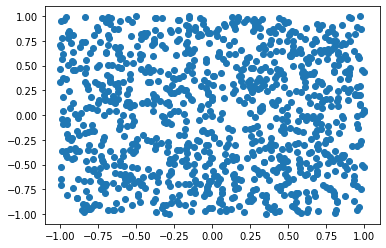

In [ ]:
N = 1000
size = 1
d = 2

X = simula_unif(N, d, size)
plt.scatter(X[:,0], X[:,1])

**b) Consideremos la función $f(x_1, x_2) = sign((x_1 − 0,2)^2 + x_2^2 − 0,6)$ que usaremos para
asignar una etiqueta a cada punto de la muestra anterior. Introducimos ruido sobre las
etiquetas cambiando aleatoriamente el signo de un $10\%$ de las mismas. Pintar el mapa
de etiquetas obtenido.**

---


Lo primero que tenemos que hacer es definir la función, después, la evaluamos en todos los puntos de la muestra.\
Para introducir ruido, he cogido un vector de índices, lo he barajado y lo recorreré hasta cambiar el 10% de cada clase


In [ ]:
# Definimos la función con dos variables
def f2(x1, x2):
	return sign((x1-0.2)**2+x2**2-0.6) 

# La evaluamos para todos los puntos generamos
y = np.zeros(N)
for i in range(N):
  y[i] = f2(X[i,0], X[i,1])

# Es el 10% de cada clase
def mete_ruido(y):
  # Para meter ruido, barajamos los índices de toda la muestra 
  indices = np.arange(y.size)
  np.random.shuffle(indices)

  # Contamos cuantos son el 10% de cada clase
  unique, counts = np.unique(y, return_counts=True)
  contadores = dict(zip(unique, counts))
  contadores[-1] //= 10
  contadores[1] //= 10
  i=0
  
  while contadores[-1]>0 or contadores[1]>0:
    if contadores[1]>0 and y[indices[i]]>0:
      y[indices[i]] *= -1
      contadores[1] -= 1

    if contadores[-1]>0 and y[indices[i]]<0:
      y[indices[i]] *= -1
      contadores[-1] -= 1
    i += 1

mete_ruido(y)

**c) Usando como vector de características (1, x1, x2), ajustar un modelo de regresión lineal al conjunto de datos generado y estimar los pesos ${\bf w}$. Estimar el error de ajuste $E_{in}$ usando SGD.**

---


Lo primero que tenemos que hacer es ampliar la matriz X que ahora tiene solo dos columnas $(x_1,x_2)$ para añadirle un $x_0$, una columna cuyos valores sean todos 1.\
Posteriormente utilizamos el Stochastic Gradient Descent para obtener una clasificación de los puntos y mostramos la bondad de este ajuste en función del error cuadrático medio y del porcentaje de aciertos, así como la gráfica donde se muestra la división

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


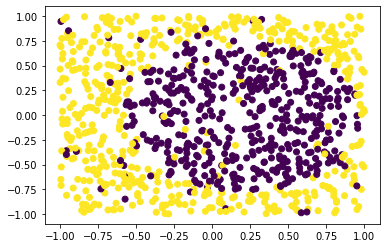

In [ ]:
# Creamos la nueva columna
a = np.ones((N,1))
X_new = np.copy(X)

# Le añadimos la nueva columna en la tercera posición
X_new = np.append(X_new, a, axis=1)
# Intercambiamos la columna en la posición 1 con la posición 3
X_new[:,[2,0]] = X_new[:,[0,2]]
# Intercambiamos la columna en la posición 3 con la posición 3
X_new[:,[2,1]] = X_new[:,[1,2]]

# Mostramos los puntos sin clasificador
draw_classification(X_new, y, np.zeros(3))


De nuevo, hago un estudio para el lr y el max_iter

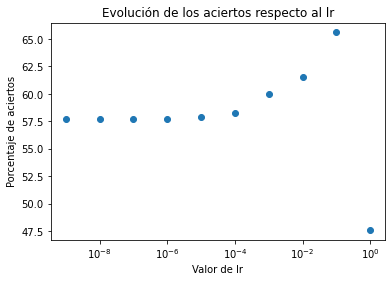

In [ ]:
# Estudio del error respecto a lr
rango = range(10)
xs = np.zeros(len(rango))
aciertos = np.zeros(len(rango))

lr = 1e-9
for i in rango:
  xs[i]=lr
  w, it = sgd(X_new,y,np.array([0,0,0]),lr, 15, 32)
  aciertos[i] = cuenta_aciertos(X_new,y,w)
  lr = lr*10
  

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(xs, aciertos)
ax.set_title("Evolución de los aciertos respecto al lr")
ax.set_xlabel("Valor de lr")
ax.set_ylabel("Porcentaje de aciertos")
ax.set_xscale("log")

Como podemos ver, el comportamiento del lr es similar al caso anterior. La mejor opción es escoger un lr = 0.01.\
Aunque hay ocasiones en que el 0.1 y el 1 dan una  mejor tasa de aciertos, es por pura casualidad, ya que en otras dan una tasa de aciertos pésima.\
El valor de lr = 0.01 sí que da un buen ajuste en la todas las ocasiones, aunque no siempre es el mejor, pero siempre es bueno, no como los otros.


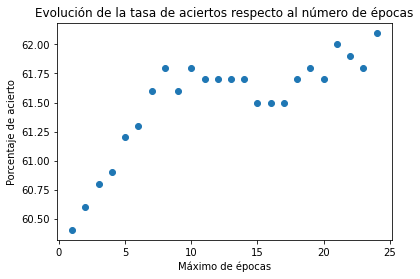

In [ ]:
# Estudio del error respecto a max_iter
xs = range(1, 25,1)
aciertos = np.zeros(len(xs))

pos = 0
for max_iters in xs:
  w, it = sgd(X_new, y, np.zeros(3),0.01, max_iters, 32)
  aciertos[pos] = cuenta_aciertos(X_new,y,w)
  pos += 1

plt.scatter(xs, aciertos)
plt.title("Evolución de la tasa de aciertos respecto al número de épocas")
plt.xlabel("Máximo de épocas")
plt.ylabel("Porcentaje de acierto")
plt.show()

Como vemos, para el valor de lr escogido, aunque el máximo no se alcance casi hasta las 20 épocas, como vemos, con tan solo 10, podemos conseguir un ajuste casi igual de bueno (apenas un 1% de diferencia).\
Esto nos va a permitir reducir enormemente el tiempo de ejecución del sgd.

Ein:  0.9124449543505241
Porcentaje de aciertos en la muestra:  61.7 %


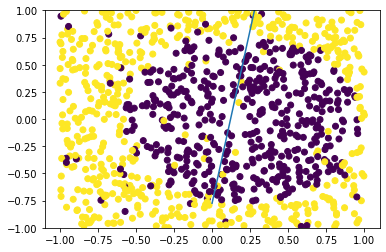

In [ ]:
# Calculamos el vector de pesos con el Stochastic Gradient Descent usado en el apartado anterior
w, it = sgd(X_new, y, np.zeros(3), 0.01, 10,  32)


# Mostramos los resultados
print("Ein: ", Err(X_new, y, w))
print("Porcentaje de aciertos en la muestra: ", cuenta_aciertos(X_new, y, w), "%")
draw_classification(X_new, y, w, range=[-1,1])

Como vemos, un ajuste lineal claramente no es capaz de separar este conjunto de muestras, dando unos valores de error y de porcentaje de aciertos muy malo (60%).

**d) Ejecutar todo el experimento definido por (a)-(c) 1000 veces (generamos 1000 muestras
diferentes) y calcular el valor medio de los errores $E_{in}$ de las 1000 muestras.
Generar 1000 puntos nuevos por cada iteración y calcular con ellos el valor de $E_{out}$
en dicha iteración. Calcular el valor medio de $E_{out}$ en todas las iteraciones.**

---


Ahora, ejecutaremos el experimento anterior 1000 veces y para ello, utilizaremos los valores más óptimos de learning rate y max_iters (épocas) que hemos obtenido empíricamente.\
En cada uno de los 1000 experimentos, obtendremos un ajuste que utilizaremos para ver la calidad tanto dentro de la muestra de entrenamiento como fuera, en otra muestra de 1000 puntos aleatorios también con ruido.\
La calidad de este ajuste será medida como en los ejercicios anteriores, error cuadrático y porcentaje de aciertos.\
(La ejecución tarda en torno a 1 minuto o 1 minuto y medio)

In [ ]:
def generaPuntos(N):
  size = 1
  d = 2
  X = simula_unif(N, d, size)
  y = np.zeros(N)
  for i in range(N):
    y[i] = f2(X[i,0], X[i,1])
  mete_ruido(y)
  a = np.ones((N,1))
  X_new = np.copy(X)

  X_new = np.append(X_new, a, axis=1)
  X_new[:,[2,0]] = X_new[:,[0,2]]
  X_new[:,[2,1]] = X_new[:,[1,2]]

  return X_new, y

errorin = 0.0
errorout = 0.0
aciertosin=np.zeros(1000)
aciertosout=np.zeros(1000)

for j in range(1000):
  # Valores de muestra
  N = 1000
  Xexp, yexp = generaPuntos(N)
  wexp, it = sgd(Xexp, yexp, np.zeros(3), 0.01, 10, 32)
  # Valores de test
  Xexp_test, yexp_test = generaPuntos(N)
  errorin+=Err(Xexp, yexp, wexp)
  errorout+=Err(Xexp_test, yexp_test, wexp)
  aciertosin[j]=cuenta_aciertos(Xexp,yexp,wexp)
  aciertosout[j]=cuenta_aciertos(Xexp_test,yexp_test,wexp)

In [ ]:
print("Error medio en la muestra: ", errorin/1000)
print("Porcentaje de aciertos medio en la muestra: ", np.average(aciertosin), "%")
print("Error medio fuera de la muestra: ", errorout/1000)
print("Porcentaje de aciertos medio fuera de la muestra: ", np.average(aciertosout), "%")

Error medio en la muestra:  0.9095079846738348
Porcentaje de aciertos medio en la muestra:  61.502 %
Error medio fuera de la muestra:  0.914226044599701
Porcentaje de aciertos medio fuera de la muestra:  61.2735 %


**e) Valore qué tan bueno considera que es el ajuste con este modelo lineal a la vista de los
valores medios obtenidos de $E_{in}$ y $E_{out}$.**

---


Como podemos observar claramente, tras ejecutar 1000 instancias del problema diferentes, todas de ellas aleatorias, el valor del porcentaje de aciertos obtenido fuera de la muestra no consigue superar el 60%, lo que nos indica que este ajuste lineal no es capaz de ajustarse a la forma de los puntos.\
Con el análisis que hemos hecho antes de ejecutar el problema con las 1000 instancias, hemos dejado claro que el problema no viene de que estemos escogiendo un lr inadecuando o un número máximo de épocas insuficientes, sino simplemente que el ajuste lineal no se puede exprimir más para ajustarse a este conjunto de datos porque no son linealmente separables.

*   **Repetir el mismo experimento anterior pero usando características no lineales. Ahora
usaremos el siguiente vector de características: $\Phi(x) = (1, x_1, x_1^2,x_1x_2, x_2, x_2^2)$. Ajustar el nuevo modelo de regresión lineal y calcular el nuevo vector de pesos $\bf\hat w$. Calcular los errores promedio de $E_{in}$ y $E_{out}$.**


Definimos la nueva matriz con las transformaciones no lineales. Esta matriz tendrá ahora las mismas filas que la matriz original, pero ahora tendrá 6 columnas, correspondientes a las transformaciones indicadas en el enunciado.\
Esto nos permitirá transformar nuestros valores de entrada con el objetivo de obtener un mejor ajuste. Es decir, convertir un conjunto de valores no linealmente separables en un conjunto de valores que sí lo sea

### Elección del learning rate

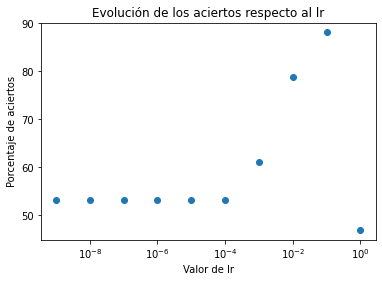

In [ ]:
lr = 1e-9
xs = np.zeros(10)
aciertos = np.zeros(10)
for i in range(10):
  xs[i] = lr
  siw, it = sgd(siX, y, np.zeros(6), lr, 5, 32)
  aciertos[i] = cuenta_aciertos(siX,y, siw)
  lr = lr * 10

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(xs, aciertos)
ax.set_title("Evolución de los aciertos respecto al lr")
ax.set_xlabel("Valor de lr")
ax.set_ylabel("Porcentaje de aciertos")
ax.set_xscale("log")

Aunque en algunos conjuntos de entrenamiento el 1 es algo mejor que el 0.1, en muchos también obtenemos peores resultados con el 1 con respecto al 0.1, por eso me quedo con el 0.1 que maximiza el acierto en todos.

### Análisis de la cantidad de épocas

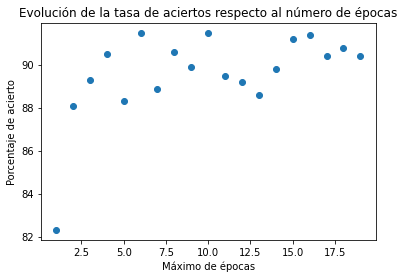

In [ ]:
from matplotlib.mathtext import Error

aciertos = np.zeros(19)
for i in range(1,20):
  siw, it = sgd(siX,y,np.zeros(6),0.1, i, 32)
  aciertos[i-1] = cuenta_aciertos(siX, y, siw)

plt.scatter(range(1,20), aciertos)
plt.title("Evolución de la tasa de aciertos respecto al número de épocas")
plt.xlabel("Máximo de épocas")
plt.ylabel("Porcentaje de acierto")
plt.show()

Como vemos, a partir de 5 épocas máximas, el porcentaje de acierto no crece más, por lo que sería lo más óptimo fijarlas en este valor.

Ejecutamos ahora de nuevo el experimento 1000 veces pero ahora, con un ajuste que incluye transformaciones no lineales a ver qué ocurre.\
(La ejecución tarda en torno a 1 minuto o 1 minuto y medio)

In [ ]:
aciertosin_nolineal = np.zeros(1000)
erroresin_nolineal = np.zeros(1000)
aciertosout_nolineal = np.zeros(1000)
erroresout_nolineal = np.zeros(1000)
for i in range(1000):
  N = 1000

  # Conjunto de entrenamiento
  X, y = generaPuntos(N)
  siX = np.zeros((y.size, 6))
  for n in range(len(X)):
    siX[n] = si(X[n])
  siw, it = sgd(siX, y, np.zeros(6), 0.1, 5, 32)

  aciertosin_nolineal = cuenta_aciertos(siX, y, siw)
  erroresin_nolineal = Err(siX, y, siw)

  # Conjunto de test
  X_test, y_test = generaPuntos(N)
  siX_test = np.zeros((y.size, 6))
  for n in range(len(X_test)):
    siX_test[n] = si(X_test[n])
  aciertosout_nolineal = cuenta_aciertos(siX_test, y_test, siw)
  erroresout_nolineal = Err(siX_test, y_test, siw)

print("Error medio dentro de la muestra: ", np.average(erroresin_nolineal))
print("Porcentaje de acierto dentro de la muestra: ", np.average(aciertosin_nolineal), "%")
print("Error fuera de la muestra: ", np.average(erroresout_nolineal))
print("Porcentaje de acierto fuera de la muestra: ", np.average(aciertosout_nolineal), "%")

Error medio dentro de la muestra:  0.46683661773031987
Porcentaje de acierto dentro de la muestra:  91.3 %
Error fuera de la muestra:  0.4569548577350649
Porcentaje de acierto fuera de la muestra:  92.30000000000001 %


*   **A la vista de los resultados de los errores promedios $E_{in}$ y $E_{out}$ obtenidos en los dos experimentos, ¿qué modelo considera que es el más adecuado? Justifique la respuesta.**

---


Como podemos observar, con la introducción de transformaciones no lineales, hemos conseguido mejorar la calidad del ajuste en casi un 30% de aciertos con respecto a la clasificación lineal y reducir el error prácticamente a la mitad.\
Sin embargo, esta técnica de introducción de características no lineales tiene un problema que es el sobreajuste. La introducción de demasiadas características no lineales con exponentes cada vez mayores puede llevar a que el modelo se ajuste únicamente al conjunto de prueba y no sea capaz de hacer buenas predicciones fuera del mismo.

#BONUS (2 puntos) 
**El BONUS solo se tendrá en cuenta si se ha obtenido al menos el 75 % de los puntos de la parte obligatoria**

**Implementar el algoritmo de minimizaciónn de Newton y aplicarlo a la función $f(x, y)$ dada en el Ejercicio 1.3. Desarrolle los mismos experimentos usando los mismos puntos de inicio.
Generar un gráfico de cómo desciende el valor de la función con las iteraciones. Extraer conclusiones sobre las conductas de los algoritmos comparando la curva de decrecimiento de la función calculada en el apartado anterior y la correspondiente obtenida con gradiente descendente**\
En primer lugar, volvemos a definir las funciones y las derivadas parciales

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
  return x**2+2*y**2+2*np.sin(2*np.pi*x)*np.sin(np.pi*y)

def dfx(x,y):
  return 2*x+2*y**2+4*np.pi*np.sin(np.pi*y)*np.cos(2*np.pi*x)

def dfy(x,y):
  return x**2+4*y+2*np.pi*np.sin(2*np.pi*x)*np.cos(np.pi*y)

def gradf(x,y):
  return np.array([dfx(x,y),dfy(x,y)])

Ahora, debemos definir la Hessiana. La matriz Hessiana, de una función $f: ℝ^n→ℝ$, cuyas segundas derivadas parciales existen y son continuas en el dominio, es una matriz de $n×n$ definida como:\
$\large (H_f)_{i,j}=\frac{∂^2f}{∂x_ix_j}$\
<br>
En nuestro caso, si la función es $f:ℝ^2→ℝ$, la matriz Hessiana quedará definida como:\
$\large H_f=\begin{pmatrix}
\frac{∂^2f}{∂x^2} & \frac{∂^2f}{∂xy} \\
\frac{∂^2f}{∂yx}  & \frac{∂^2f}{∂y^2}
\end{pmatrix}$\
<br>
Definámosla entonces en python calculando las segundas derivadas, sabiendo que:
$\large \frac{∂f}{∂x}=2x+2y^2+4π\sin(\pi y)\cos(2\pi x)$\
<br>
$\large \frac{∂f}{∂y}=x^2+4y+2π\sin(2πx)\cos(πy)$\
<br>
De esta forma:\
$\large \frac{∂^2f}{∂x^2}=2+2y^2-8π^2\sin(πy)\sin(2πx)$\
<br>
$\large \frac{∂^2f}{∂y^2}=x^2+4-2π^2\sin(2πx)\sin(πy)$\
<br>
$\large \frac{∂^2f}{∂y∂x}=2x+4y+4π^2\cos(πy)\cos(2πx)$\
<br>
$\large \frac{∂^2f}{∂x∂y}=2x+4y+4π^2\cos(2πx)\cos(πy)$\
<br>
Y ya con esto podemos definir la hessiana como vimos antes


In [ ]:
def df2x(x,y):
  return 2+2*y**2-8*np.pi**2*np.sin(np.pi*y)*np.sin(2*np.pi*x)

def df2y(x,y):
  return x**2+4-2*np.pi**2*np.sin(2*np.pi*x)*np.sin(np.pi*y)

def df2yx(x,y):
  return 2*x+4*y+4*np.pi**2*np.cos(np.pi*y)*np.cos(2*np.pi*x)

def df2xy(x,y):
  return 2*x+4*y+4*np.pi**2*np.cos(2*np.pi*x)*np.cos(np.pi*y)

def Hessian(x,y):
  return np.array([[df2x(x,y), df2xy(x,y)], [df2yx(x,y), df2y(x,y)]])

De esta forma, ya tenemos definida la hessiana. Ahora, implementamos el método de Newton

In [ ]:
def Newton(f, gradf, H, lr, w_0, max_iter):
  ws.clear()
  w = np.transpose([w_0])
  it = 0

  while it<max_iter:
    ws.append(w[:,0])
    Hinv = np.linalg.inv(Hessian(w[0,0],w[1,0]))
    w = w - lr*np.dot(Hinv, gradf(w[0], w[1]))
    it+=1

  ws.append(w[:,0])
  return w[:,0], it

Y lo ejecutamos con un learning rate de 0.01 y 1000 iteraciones máximas, partiendo del punto (-0.5,0.5)

In [ ]:
ws = []
w = np.array([-0.5,0.5])
w, it = Newton(f, gradf, Hessian, 0.01, w, 1000)

display_figure(1, f, ws, 'viridis', "Newton on f(x,y)")

print("Número de iteraciones: ", it)
print("Coordenada alcanzada: ", w)
print("Valor alcanzado: ", f(w[0], w[1]))

[[2.5  1.  ]
 [1.   4.25]]


NameError: ignored

Experimento similar al Ejercicio 1.3 para ver la influencia del punto inicial en el método de Newton

[[ 2.5  -3.  ]
 [-3.    4.25]]
p0= ( -0.5 ,  -0.5 )
Numero de iteraciones:  100
Coordenadas obtenidas: ( -3.3997648837633925 ,  -1.9699495286179678 )
Valor obtenido:  19.208761825426922
[[  4.        -33.4784176]
 [-33.4784176   5.       ]]
p0= ( 1.0 ,  1.0 )
Numero de iteraciones:  100
Coordenadas obtenidas: ( -0.2990681550447081 ,  -1.2086871913380295 )
Valor obtenido:  1.849495165844477
[[25.16137466 26.17551898]
 [26.17551898 11.99534367]]
p0= ( 2.1 ,  -2.1 )
Numero de iteraciones:  100
Coordenadas obtenidas: ( 0.2668929131856403 ,  0.6381382423677964 )
Valor obtenido:  2.6900644013584794
[[ 20.        -33.4784176]
 [-33.4784176  13.       ]]
p0= ( -3 ,  3 )
Numero de iteraciones:  100
Coordenadas obtenidas: ( -6.64332871675244 ,  48.083994376967304 )
Valor obtenido:  4668.68365036217
[[10.        43.4784176]
 [43.4784176  8.       ]]
p0= ( -2 ,  2 )
Numero de iteraciones:  100
Coordenadas obtenidas: ( -2.308017527485711 ,  1.7403370866096404 )
Valor obtenido:  12.74527164830935


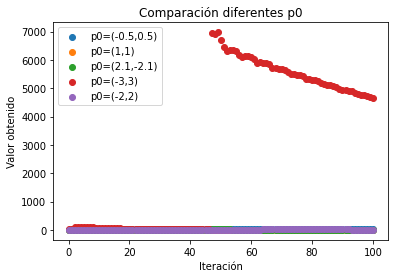

In [ ]:
ws=[]
p0 = np.array([-0.5,-0.5])
lr = 0.01
max_iter = 50
w, it = Newton(f, gradf, Hessian, 0.1, p0, 100)

sep="================================="
print ("p0= (", p0[0], ", ", p0[1], ")")
print ('Numero de iteraciones: ', it)
print ('Coordenadas obtenidas: (', w[0], ', ', w[1],')')
print ('Valor obtenido: ', f(w[0],w[1]))

valores0 = np.zeros(len(ws))
for i in range(len(ws)):
  valores0[i] = f(ws[i][0], ws[i][1])

print (sep)

p0 = np.array([1.0,1.0])
w, it = Newton(f, gradf, Hessian, 0.1, p0, 100)
print ("p0= (", p0[0], ", ", p0[1], ")")
print ('Numero de iteraciones: ', it)
print ('Coordenadas obtenidas: (', w[0], ', ', w[1],')')
print ('Valor obtenido: ', f(w[0],w[1]))
valores1 = np.zeros(len(ws))
for i in range(len(ws)):
  valores1[i] = f(ws[i][0], ws[i][1])
print (sep)

p0 = np.array([2.1,-2.1])
w, it = Newton(f, gradf, Hessian, 0.1, p0, 100)

print ("p0= (", p0[0], ", ", p0[1], ")")
print ('Numero de iteraciones: ', it)
print ('Coordenadas obtenidas: (', w[0], ', ', w[1],')')
print ('Valor obtenido: ', f(w[0],w[1]))
valores2 = np.zeros(len(ws))
for i in range(len(ws)):
  valores2[i] = f(ws[i][0], ws[i][1])
print (sep)


p0 = np.array([-3,3])
w, it = Newton(f, gradf, Hessian, 0.1, p0, 100)

print ("p0= (", p0[0], ", ", p0[1], ")")
print ('Numero de iteraciones: ', it)
print ('Coordenadas obtenidas: (', w[0], ', ', w[1],')')
print ('Valor obtenido: ', f(w[0],w[1]))
valores3 = np.zeros(len(ws))
for i in range(len(ws)):
  valores3[i] = f(ws[i][0], ws[i][1])
print (sep)

p0 = np.array([-2,2])
w, it = Newton(f, gradf, Hessian, 0.1, p0, 100)

print ("p0= (", p0[0], ", ", p0[1], ")")
print ('Numero de iteraciones: ', it)
print ('Coordenadas obtenidas: (', w[0], ', ', w[1],')')
print ('Valor obtenido: ', f(w[0],w[1]))
valores4 = np.zeros(len(ws))
for i in range(len(ws)):
  valores4[i] = f(ws[i][0], ws[i][1])
print (sep)


import matplotlib.pyplot as plt
plt.title("Comparación diferentes p0")
plt.xlabel("Iteración")
plt.ylabel("Valor obtenido")
plt.scatter(range(len(ws)),valores0, label="p0=(-0.5,0.5)")
plt.scatter(range(len(ws)),valores1, label="p0=(1,1)")
plt.scatter(range(len(ws)),valores2, label="p0=(2.1,-2.1)")
plt.scatter(range(len(ws)),valores3, label="p0=(-3,3)")
plt.scatter(range(len(ws)),valores4, label="p0=(-2,2)")
plt.legend()
plt.show()

Como podemos ver, para algunos valores, cuando el algoritmo comienza demasiado lejos de algún mínimo, la Hessiana no va en la dirección correcta, ya que no minimiza la función.\
Quitamos estos valores para ver mejor el resto

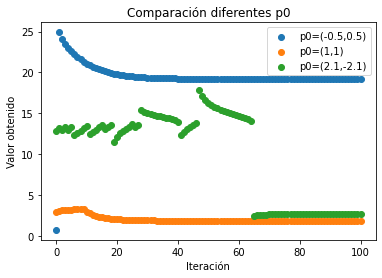

In [ ]:
plt.title("Comparación diferentes p0")
plt.xlabel("Iteración")
plt.ylabel("Valor obtenido")
plt.scatter(range(len(ws)),valores0, label="p0=(-0.5,0.5)")
plt.scatter(range(len(ws)),valores1, label="p0=(1,1)")
plt.scatter(range(len(ws)),valores2, label="p0=(2.1,-2.1)")
plt.legend()
plt.show()

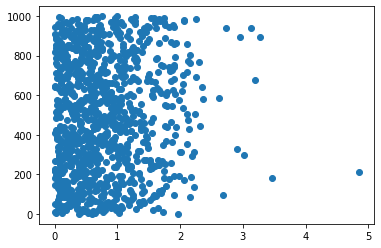

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xs = [] 
for i in range(1000):
  xs.append(abs(np.random.normal()))

plt.scatter(xs, range(len(xs)))